### Asymptotic Notation

In this notebook we will work on developing mathematical formalism for the the guiding principles we defined in the previous notebook. The goal is to identify the sweet spot of granularity for analysis of the running time of the algorithms and suppress lower order terms and constants.

Asymptotic notations provides basic voculabulary for discussing the design and analysis of the algorithms. The constant factors are to a great extent dependent on the system on which the program is run and lower order terms are irrelevant for large inputs.

Previously we analyzed the upper bound of the running time of Merge sort is $6nlogn + 6n$. The value 6 is system dependent and the value $nlogn$ is far greater than $n$ for large inputs. Thius we say, the big-O or merge sort is nlogn and is written as $O(nlogn)$

Intuitively $O(f(n))$ for a function $f(n)$ means that $f(n)$ is whats left after we suppress the constants and lower order terms.

---

#### Big-O Notation

The English version of Big-O Notation is $T(n) = O(f(n))$ ***if and only if*** $T(n)$ *is **eventually** bounded above by a constant multiple of* $f(n)$

The mathematical version states that 

$T(n) = O(f(n)) \iff T(n) \leq c\cdot f(n) \\ \forall n \geq n_0$

Let us look at these equations and plot them.

$T(n) = 6nlogn + 6n \\ f(n) = nlogn$

We will fix the constant $c$ to be 12 for the following plotting.


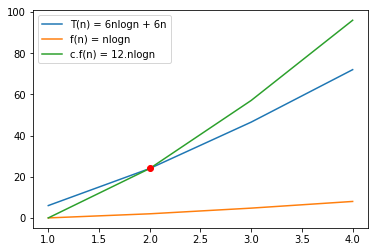

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(1, 5)
tn = 6 * x * np.log2(x) + 6 * x
fn = x * np.log2(x)
cfn = 12 * x * np.log2(x)
plt.plot(x, tn, label = 'T(n) = 6nlogn + 6n')
plt.plot(x, fn, label = 'f(n) = nlogn')
plt.plot(x, cfn, label = 'c.f(n) = 12.nlogn')
plt.plot(x[tn - cfn == 0], cfn[tn - cfn == 0], 'ro')
plt.legend()
plt.show()


As we see in the above plot, $T(n) \leq c \cdot f(n)$. When $c$ is 12, we see $n_0$ is equal to 2. Thus for no value of n greater than or equal to 2, $T(n) > c \cdot f(n)$. The value of c = 12 is by no means the only legal value. In fact we can change the value of c to 8 and see that $n_0$ changes to 8. The only requirement is that c and $n_0$ are constants not dependent on n and the condition $T(n) \leq c \cdot f(n)$ holds true for any value of $n \geq n_0$

Have seen Big-O, we will now see two basic examples and come up with mathematical proofs for our claims. The proofs will be a sanity check that the Big-O is achieving the intended goal of suppressing the lower order terms and constant factors.

---

*** Degree-k polynomial is *** $O(n^k)$

Our claim is of $T(n)$ is a polynomial with degree-k, then $T(n) = O(n^k)$

Let $T(n) = a_kn^k + ... a_1n + a_0$ where $k \geq 0$ and $a_i$ is a real number

Let $c = |a_k| + |a_{k - 1}| ... |a_0|$

$T(n) = a_kn^k + ... a_1n + a_0 \leq |a_k|n^k + ... |a_1|n + |a_0| \leq |a_k|n^k + ... |a_1|n^k + |a_0|n^k$

$T(n) \leq (|a_k| + ... |a_1| + |a_0|)\cdot n^k$


Which is same as saying $T(n) \leq c\cdot n ^k$

Thus by definition of Big-O, we can conclude that $T(n) = O(n^k)$

Following is actually not an example

---

*** Degree-k polynomial is not *** $O(n^{k - 1})$

We will prove this by contradiction. We assume that $T(n) = n^k$ is $O(n^{k - 1})$

Thus by definition $T(n) \leq c\cdot O(n^{k - 1})$

which also implies that $n^k \leq c\cdot n^{k - 1}$
Cancelling out $n^{k - 1}$ on both sides, we get $n \leq c$ for $n \geq n_0$. This means c is greater than all positive numbers

Which violates the basic rule that c and $n_0$ are finite constants and independent of n. Thus we can say $n^k$ **is not** $O(n^{k - 1})$

---

We will now see two more concepts, Big-Omega and Big-Theta notation. We will summarize all three notations, including Big-O below to compare them.

- Big-O:     $\:\:\:T(n) = O(n) \iff T(n) \leq c \cdot f(n) \:\:\:\:\:\: \forall n \geq n_0 $
- Big-Omega: $\:\:\:T(n) = \Omega(n) \iff T(n) \geq c \cdot f(n) \:\:\:\:\:\: \forall n \geq n_0 $
- Big-Theta: $\:\:\:T(n) = \Theta(n) \iff c_1\cdot f(n) \leq T(n) \leq c_2 \cdot f(n) \:\:\:\:\:\: \forall n \geq n_0$


Often where Big-Theta notation is more apt, developers still use the Big-O notation as we are usually interested in worst case guarantees. For example, the merge subroutine in merge sort performs the merge in guaranteed linear time and thus the time complexity if $\Theta(n)$, however, we still call it $O(n)$.

Let us look at the the same $T(n)$ used for Merge sort and look at the Big Omega times, we will use the following equations and plot the values

$T(n) = 6nlog(n) + 6n\\f(n) = n$

We will fix the constant $c, c_1$ and $c_2$ to be 12, 6 and 12 respectively

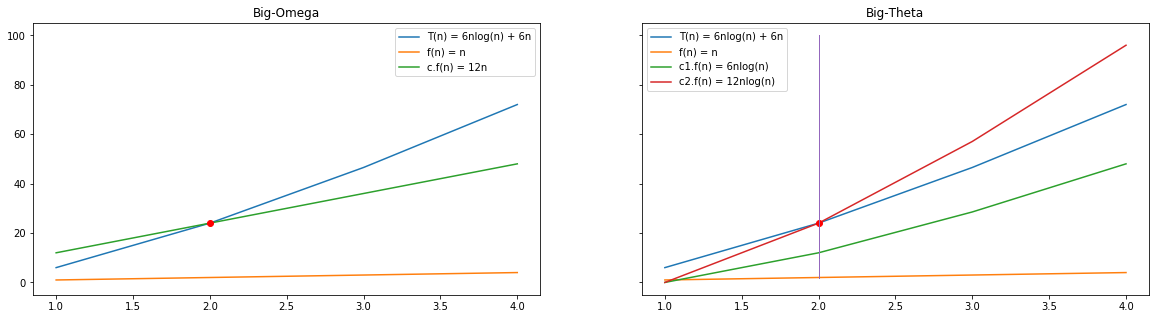

In [2]:
x = np.arange(1, 5)
tn = 6 * x * np.log2(x) + 6*x
c1x = 6 * x * np.log2(x)
c2x = 12 * x * np.log2(x)
cx = 12 * x
f, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5), sharey = True)
ax1.plot(x, tn, label = 'T(n) = 6nlog(n) + 6n')
ax1.plot(x, x, label = 'f(n) = n')
ax1.plot(x, cx, label = 'c.f(n) = 12n')
ax1.plot(x[1], tn[1], 'ro')
ax1.set_title('Big-Omega')
ax1.legend()

ax2.plot(x, tn, label = 'T(n) = 6nlog(n) + 6n')
ax2.plot(x, x, label = 'f(n) = n')
ax2.plot(x, c1x, label = 'c1.f(n) = 6nlog(n)')
ax2.plot(x, c2x, label = 'c2.f(n) = 12nlog(n)')
ax2.plot(x[1], tn[1], 'ro')
ax2.plot([2, 2], [2, 100], lw = '1')
ax2.set_title('Big-Theta')
ax2.legend()
plt.show()


The first plot for Big-Omega above shows us that 

$T(n) >= 12 \cdot f(n) \:\: for \:\:n \geq 2$.
Thus $T(n) = \Omega(n) \:\: for \:\:n \geq 2 \:\: and \:\: c = 12$

Now for Big Theta, 

We see for $f(n) = nlog(n),\:T(n) = 6nlog(n) + 6n\\6\cdot f(n) \leq T(n) \leq 12 \cdot f(n)\:\: for\:\:n\geq 2$

Thus $T(n) = \Theta(n\cdot log(n))\:\:for\:\:c_1 = 6,\: c_2 = 12\:and\:n \geq 2$

---

** Quiz **

Let $T(n) = n^2 / 2 + 3n$, Which of the following statements are correct

- a) $T(n) = O(n)$
- b) $T(n) = \Omega(n)$
- c) $T(n) = \Theta(n^2)$
- d) $T(n) = O(n^3)$
 
b is correct, $T(n)$ is quadratic and thus it is easy to show $T(n) \geq c\cdot n$. This however is not a good lower bound but correct.

c is correct, we can come up with two constants $c_1 = 1/4$ and $c_2 = 2$ and show that $c_1\cdot f(n) \leq T(n) \leq c_2\cdot f(n)$ 

d is correct as $T(n) <= c\cdot f(n)$, though not an impressive upper bound as $T(n)$ is quadratic where as $f(n)$ is cubic

--- 

Little-O notation

Little-0 notation is similar to the Big-O notation but is more strict in terms of the constant chosen. In case of Big-O notation, the constant s any positive value. However, in case of Little-O the constraint for c is strictly $c > 0$

Mathematically, $T(n) = o(f(n)) \iff T(n) \leq c\cdot f(n) \:\: \forall n \geq n_0 \: and\: c > 0 $

Claim: $T(n) = n^{k-1} \: then \: T(n) = o(n^k)$

Proof: 

$ n^{k - 1} \leq c\cdot n^k \implies c \geq 1/n\\ as\: n \to\infty,\: c \to 0\\thus\:for\:c > 0\:\:n^{k-1} = o(n^k)$

---

#### Additional Examples

---
*Adding a constant to exponent*

*Proposition: *

$if\: T(n) = 2^{n + 10},\:then\:\:T(n) = O(2^n)$

For $T(n) = O(2^n)$, the following should hold true

$2^{n + 10} \leq c.2^n$

the above equation holds true for $c \geq 1024$. Hence $2^{n + 10} = O(2^n)$

---

*Multiplying a constant to exponent*

*Proposition: *

$if\: T(n) = 2^{10n},\:then\:\:T(n)\: is\:not\: O(2^n)$

The proof is by contradiction. Suppose

$2 ^{10n} = O(2^n) \implies 2^{10n} \leq c\cdot 2^n$

Thus $c \geq 2^{9n}$

c is a constant independent of n and as we see above c depends on n and $c \to\infty$ hence $2^{10n}$ **is not** $O(2^n)$

---

*Maximum Vs Sum*

*Proposition:*

Let f an g define functions from positive integers to non negative real numbers.

$if \:\:T(n) = max(f(n), g(n)) \:\: for\:\: n \geq 1 \:\:then\:\: T(n) = \Theta(f(n) + g(n))$

For any arbitrary n, we know that $max(f(n), g(n)) \leq f(n) + g(n)$

Similarly, $2\cdot max(f(n), g(n)) \geq f(n) + g(n) \implies 0.5\cdot (f(n) + g(n)) \leq max(f(n), g(n))$

Thus from above two statements we can see that 

$0.5\cdot (f(n) + g(n)) \leq max(f(n), g(n)) \leq (f(n) + g(n))$

By definition,

$T(n) = \Theta(f(n)) \iff c_1\cdot f(n) \leq T(n) \leq c_2\cdot f(n) \:\: \forall n \geq n_0$

From above, we see that 

$c_1 = 0.5\\c_2 = 1\\n > 0$

and

$max(f(n), g(n)) = \Theta(f(n) + g(n))$

---

#### Test Your Understanding

---

Let f and g be non-decreasing real-values functions defined on positive integers with $f(n)$ and $g(n)$ at least 1 for $n \geq 1$. Assume that $f(n) = O(g(n))$, ald let c be positive constant. Is $f(n).log_2(f(n)^c) = O(g(n).log_2(g(n)))$?

A: Yes, $f(n).log_2(f(n)^c) = c\cdot f(n).log_2(f(n))$. Since its is big-o notation, the constants are suppressed and thus $f(n).log_2(f(n)) \leq O((n).log_2(g(n)))$ given $f(n) = O(g(n))$

---

Assume again two positive non-decreasing functions f and g such that $f(n) = O(g(n))$. Is $2^{(f(n))} = O(2^{g(n)})$?

A: If $f(n) \leq g(n)$ then $2^{f(n)} \leq 2^{g(n)}$. This given $f(n) \leq g(n)$ for sufficiently large n, $2^{f(n)} = O(2^{g(n)})$.

---

Following function prints values of for the given value n for various functions passed to it





In [3]:
def evaluateFns(x, **kwargs):
    return [(k, f(x))for k, f in kwargs.items()]

In [4]:
evaluated = evaluateFns(10, sqrt = lambda n: np.sqrt(n), 
            ten_to_n = lambda n: 10 ** n,
            n_to_1_5 = lambda n: n ** 1.5,
            two_to_sqrt_logn = lambda n: 2 ** np.sqrt(np.log(n)),
            n_to_5_by_3 = lambda n: n ** (5 / 3),
            n_square_log_n = lambda n: n * n * np.log2(n),
            two_to_n = lambda n: 2 ** n,
            two_to_two_to_n = lambda n: 2 ** (2 ** n),
            n_to_logn = lambda n: n ** np.log2(n),
            n_square = lambda n: n ** n,
            two_to_log_n = lambda n: 2 ** np.log2(n),
            two_to_two_to_log_n = lambda n: 2 ** (2 ** np.log2(n)),
            n_to_5_by_2 = lambda n: n ** (5 / 2),
            two_to_n_square = lambda n: 2 ** (n * n)            
            )
sorted(evaluated, key = lambda t: t[1])           

[('two_to_sqrt_logn', 2.862800485405474),
 ('sqrt', 3.1622776601683795),
 ('two_to_log_n', 9.999999999999998),
 ('n_to_1_5', 31.622776601683793),
 ('n_to_5_by_3', 46.4158883361278),
 ('n_to_5_by_2', 316.22776601683796),
 ('n_square_log_n', 332.1928094887362),
 ('two_to_two_to_log_n', 1023.9999999999987),
 ('two_to_n', 1024),
 ('n_to_logn', 2098.592395866662),
 ('ten_to_n', 10000000000),
 ('n_square', 10000000000),
 ('two_to_n_square', 1267650600228229401496703205376),
 ('two_to_two_to_n',
  179769313486231590772930519078902473361797697894230657273430081157732675805500963132708477322407536021120113879871393357658789768814416622492847430639474124377767893424865485276302219601246094119453082952085005768838150682342462881473913110540827237163350510684586298239947245938479716304835356329624224137216)]